# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [84]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer

## Load the Data

In [2]:
df=pd.read_csv('/content/Traffic_Accidents (1).csv')
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009.0
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010.0
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005.0
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007.0
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21588,313960.0,181630.0,-3.241694,51.526956,62,3.0,3,1.0,17/02/2006,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2006.0
21589,228766.0,642993.0,-4.722931,55.650250,97,3.0,2,1.0,27/12/2013,6,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,1.0,Yes,2013.0
21590,519170.0,142740.0,-0.296757,51.171433,45,3.0,1,1.0,10/07/2010,7,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2010.0
21591,324680.0,501640.0,-3.161858,54.404635,3,2.0,1,1.0,07/10/2012,1,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,2.0,Yes,2012.0


In [31]:
df.drop(['Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Weather_Conditions','Road_Surface_Conditions'],axis=1,inplace=True)

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [3]:
df.dtypes

,0
Location_Easting_OSGR,float64
Location_Northing_OSGR,float64
Longitude,float64
Latitude,float64
Police_Force,int64
Accident_Severity,float64
Number_of_Vehicles,int64
Number_of_Casualties,float64
Date,object
Day_of_Week,int64


In [4]:
df.shape

(21593, 26)

In [5]:
df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,158
Number_of_Vehicles,0
Number_of_Casualties,471
Date,0
Day_of_Week,0


In [6]:
df.duplicated().sum()

4

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df['Accident_Severity'].value_counts()

,count
Accident_Severity,
3.0,18227
2.0,2916
1.0,288


In [9]:
df['Accident_Severity'].mode()

,Accident_Severity
0,3.0


In [10]:
df['Accident_Severity']= df['Accident_Severity'].fillna(3.0)

In [11]:
df['Urban_or_Rural_Area'].value_counts()

,count
Urban_or_Rural_Area,
1.0,13747
2.0,7803
3.0,1


In [12]:
df['Urban_or_Rural_Area'].mode()

,Urban_or_Rural_Area
0,1.0


In [13]:
df['Urban_or_Rural_Area']=df['Urban_or_Rural_Area'].fillna(1.0)

In [14]:
df['Number_of_Casualties'].value_counts()

,count
Number_of_Casualties,
1.0,16117
2.0,3454
3.0,992
4.0,339
5.0,124
6.0,60
7.0,12
8.0,10
9.0,3


In [15]:
df['Number_of_Casualties'].mode()

,Number_of_Casualties
0,1.0


In [16]:
df['Number_of_Casualties']=df['Number_of_Casualties'].fillna(1.0)

In [35]:
df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0


In [36]:
df['Year'].mode()

,Year
0,2006.0


In [37]:
df['Year']=df['Year'].fillna(2006.0)

In [33]:
df['Did_Police_Officer_Attend_Scene_of_Accident'].mode()

,Did_Police_Officer_Attend_Scene_of_Accident
0,Yes


In [34]:
df['Did_Police_Officer_Attend_Scene_of_Accident']=df['Did_Police_Officer_Attend_Scene_of_Accident'].fillna('Yes')

In [18]:
df.drop(['Light_Conditions'],axis=1,inplace=True)

In [39]:
le = LabelEncoder()
df['Road_Type'] = le.fit_transform(df['Road_Type'])
df['Did_Police_Officer_Attend_Scene_of_Accident'] = le.fit_transform(df['Did_Police_Officer_Attend_Scene_of_Accident'])# حولتها من yas &no to 1-2

In [40]:
df['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts()

,count
Did_Police_Officer_Attend_Scene_of_Accident,
1,17563
0,4026


In [38]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,E10000011,3,22,Dual carriageway,70,-1,0,2.0,Yes,2009.0
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,E09000017,4,466,Single carriageway,30,6,0,1.0,Yes,2010.0
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,W06000014,6,0,Single carriageway,30,3,4055,1.0,Yes,2005.0
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,E10000017,6,0,One way street,30,6,0,1.0,Yes,2007.0
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,E06000021,6,0,Single carriageway,30,-1,0,1.0,Yes,2013.0


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

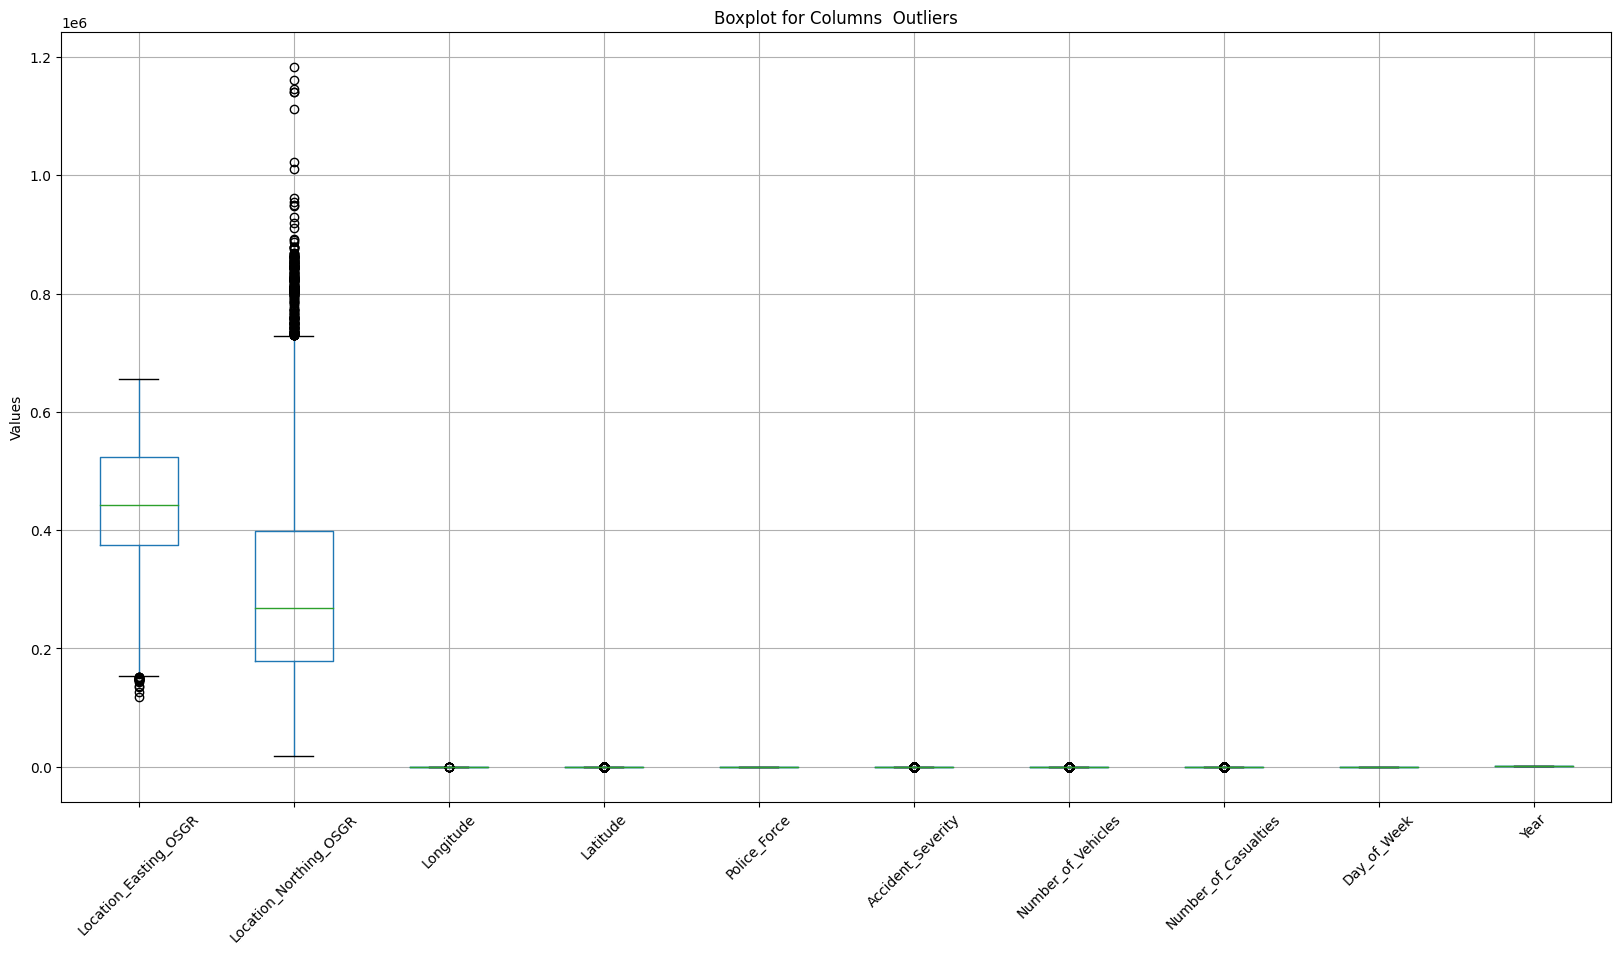

In [19]:
columns_ = ['Location_Easting_OSGR','Location_Northing_OSGR','Longitude','Latitude','Police_Force','Accident_Severity','Number_of_Vehicles','Number_of_Casualties','Day_of_Week','Year']

plt.figure(figsize=(20, 10))
df[columns_].boxplot()

plt.title('Boxplot for Columns  Outliers')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [47]:
df.drop(['Local_Authority_(Highway)'],axis=1,inplace=True)

In [60]:
df['Location_Easting_OSGR'] = df['Location_Easting_OSGR'].astype('int')

In [62]:
df['Location_Northing_OSGR'] = df['Location_Northing_OSGR'].astype('int')

In [63]:
df['Year'] = df['Year'].astype('int')

In [67]:
df['Accident_Severity']=df['Accident_Severity'].astype('int')

In [66]:
df['Urban_or_Rural_Area']=df['Urban_or_Rural_Area'].astype('int')

In [72]:
df['Latitude']=df['Latitude'].astype('int')

In [73]:
df['Longitude']=df['Longitude'].astype('int')

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

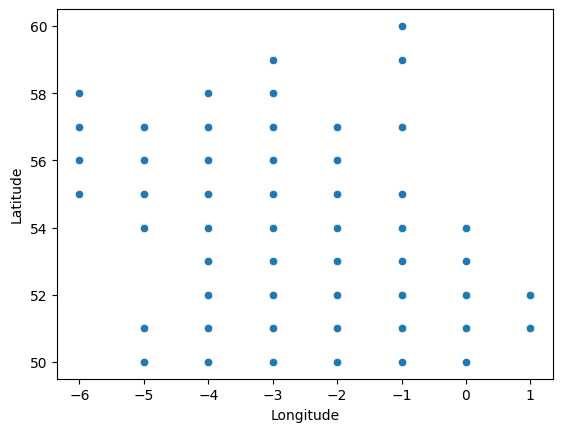

In [74]:
sns.scatterplot(x='Longitude', y='Latitude', data=df);

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [75]:
scl = StandardScaler()
df1 = scl.fit_transform(df)
df1

array([[ 1.25875267, -1.21457296,  0.88756006, ...,  1.32866057,
         0.47878169, -0.13009098],
       [ 0.71734257, -0.6999028 ,  0.88756006, ..., -0.75233573,
         0.47878169,  0.20382105],
       [-1.31962516, -0.81147033, -1.52380797, ..., -0.75233573,
         0.47878169, -1.4657391 ],
       ...,
       [ 0.82537311, -0.97467804,  0.88756006, ...,  1.32866057,
         0.47878169,  0.20382105],
       [-1.21253766,  1.24492206, -1.52380797, ...,  1.32866057,
         0.47878169,  0.87164512],
       [ 0.65059625,  0.81528813,  0.88756006, ..., -0.75233573,
         0.47878169, -1.13182707]])

In [76]:
pcl =PCA(n_components=0.9)
df1 = pcl.fit_transform(df1)

In [78]:
wcss =[]

for i in range(1,11):
  kmeans = KMeans(n_clusters=i,random_state=42)
  kmeans.fit(df1)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [71]:
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530,103950,0.277298,50.812789,47,3,1,1.0,6,556,3,22,0,70,-1,0,2,1,2009
1,508860,187170,-0.430574,51.572846,1,3,2,1.0,1,26,4,466,3,30,6,0,1,1,2010
2,314460,169130,-3.231459,51.414661,62,3,2,1.0,4,746,6,0,3,30,3,4055,1,1,2005
3,341700,408330,-2.881800,53.568318,4,3,1,2.0,7,84,6,0,1,30,6,0,1,1,2007
4,386488,350090,-2.203020,53.047882,21,3,2,2.0,3,257,6,0,3,30,-1,0,1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21588,313960,181630,-3.241694,51.526956,62,3,3,1.0,6,741,1,4,0,70,-1,0,2,1,2006
21589,228766,642993,-4.722931,55.650250,97,3,2,1.0,6,931,3,738,3,30,6,0,1,1,2013
21590,519170,142740,-0.296757,51.171433,45,3,1,1.0,7,512,6,0,3,30,-1,0,2,1,2010
21591,324680,501640,-3.161858,54.404635,3,2,1,1.0,1,65,6,0,3,60,-1,0,2,1,2012


## Evaluation
Evaluate the clustering result using appropriate metrics.


## Plot the data points with their predicted cluster center

NameError: name 'labels' is not defined

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?